In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
# load iris dataset
iris = load_iris()
'''
data : 학습하고자 하는 데이터 / target : 라벨 정보
'''

x = iris.data # iris 데이터에서 feature 데이터를 가져와서 x 변수에 할당
y = iris.target # iris 데이터에서 label 데이터를 가져와서 y 변수에 할당

In [6]:
# LinearDiscriminantAnalysis model
lda = LinearDiscriminantAnalysis() # LDA 모델 객체 생성
lda.fit(x, y) # x와 y 데이터를 사용해서 LDA 모델 학습


LinearDiscriminantAnalysis()

In [7]:
# LDA 모델의 score 함수를 사용해 정확도 계산
train_acc = lda.score(x, y)
print(train_acc)

0.98


In [8]:
# plot decision boundaries
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
# np.meshgrid() 함수를 사용해서 x_min부터 x_max까지의 범위와 y_min부터 y_max까지의 범위를 200등분한 좌표 생성
z = lda.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape), np.zeros(xx.ravel().shape)])
# np.c 함수를 사용하여 xx와 yy 배열을 연결하여 2차원 평면상의 모든 좌표점을 구함
# 이때 np.zeros 함수를 사용해서 나머지 2개의 특성에 대한 값을
# 0으로 초기화
# 마지막 lda.predic() 함수를 사용하여 각 좌표점의 클래스 레이블을 예측
# 이를 배열 z에 저장
# z 배열의 각 값은 해당 죄표점이 속하는 클래스

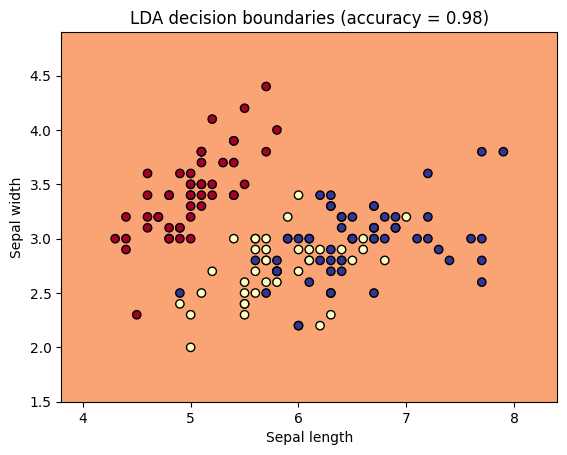

In [9]:
# Put the result into a color plot
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.RdYlBu, alpha=.8)

# Plot the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('LDA decision boundaries (accuracy = {:.2f})'.format(train_acc))
plt.show()